In [1]:
#Visualizes chlorophyll concentrations by location and sample type
#Author: Bodhi Fox

In [2]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
#Reads in csv with chlorophyll data

df= pd.read_csv('Chlorophyll Template Generic_Bodhi.csv',index_col=False, delimiter=',') 
df


,Sample ID,Chl vial #,Vol. filtered for Chl (ml),Date extraction,Acetone (ml) added to filter (extraction),Date Run,sample (ml) from acetone + filter,acetone (ml) added to sample (dilution),Dilution Ratio,Vol. Extracted / Vol. Filtered,...,Fa blank,Fa* = Fa - Fa blank,Fo* - Fa*,Chl (ug/l),Phaeo (ug/l),Notes,Calibration Date,K,Fm,Fm/ (Fm-1)
0,pc1,NaN,219,NaN,5.0,NaN,1,4,0.2,0.022831,...,0,146.0,116.0,27.503322,0.189678,NaN,3/8/2024,0.9231,1.8,2.25
1,pc2,NaN,220,NaN,5.8,NaN,1,4,0.2,0.026364,...,0,126.0,94.0,25.735608,1.861725,NaN,NaN,NaN,NaN,NaN
2,pc3,NaN,210,NaN,5.0,NaN,1,4,0.2,0.023810,...,0,187.0,150.0,37.088839,-0.098904,NaN,NaN,NaN,NaN,NaN
3,pe1,NaN,50,NaN,5.0,NaN,1,4,0.2,0.100000,...,0,42.4,31.4,32.608508,2.616989,NaN,NaN,NaN,NaN,NaN
4,pe2,NaN,50,NaN,5.0,NaN,1,4,0.2,0.100000,...,0,47.1,35.6,36.970155,2.160054,NaN,NaN,NaN,NaN,NaN
5,pe3,NaN,50,NaN,5.0,NaN,1,4,0.2,0.100000,...,0,46.9,35.6,36.970155,1.993896,NaN,NaN,NaN,NaN,NaN
6,rc1,NaN,50,NaN,5.0,NaN,1,4,0.2,0.100000,...,0,31.6,16.9,17.550439,8.702525,NaN,NaN,NaN,NaN,NaN
7,rc2,NaN,50,NaN,5.0,NaN,1,4,0.2,0.100000,...,0,39.3,23.1,23.989061,8.660986,NaN,NaN,NaN,NaN,NaN
8,rc3,NaN,50,NaN,5.0,NaN,1,4,0.2,0.100000,...,0,28.2,13.3,13.811884,9.616394,NaN,NaN,NaN,NaN,NaN
9,re1,NaN,50,NaN,5.0,NaN,1,4,0.2,0.100000,...,0,23.4,11.8,12.254153,7.186333,NaN,NaN,NaN,NaN,NaN


C:\Users\bodhi\AppData\Local\Temp\ipykernel_28640\2830920549.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Location'] == 'Pond'], x='Type', y='Chl (ug/l)', ax=axes[0],palette={"Control": "skyblue", "Experimental": "salmon"})
C:\Users\bodhi\AppData\Local\Temp\ipykernel_28640\2830920549.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Location'] == 'Raritan'], x='Type', y='Chl (ug/l)', ax=axes[1], palette={"Control": "skyblue", "Experimental": "salmon"})


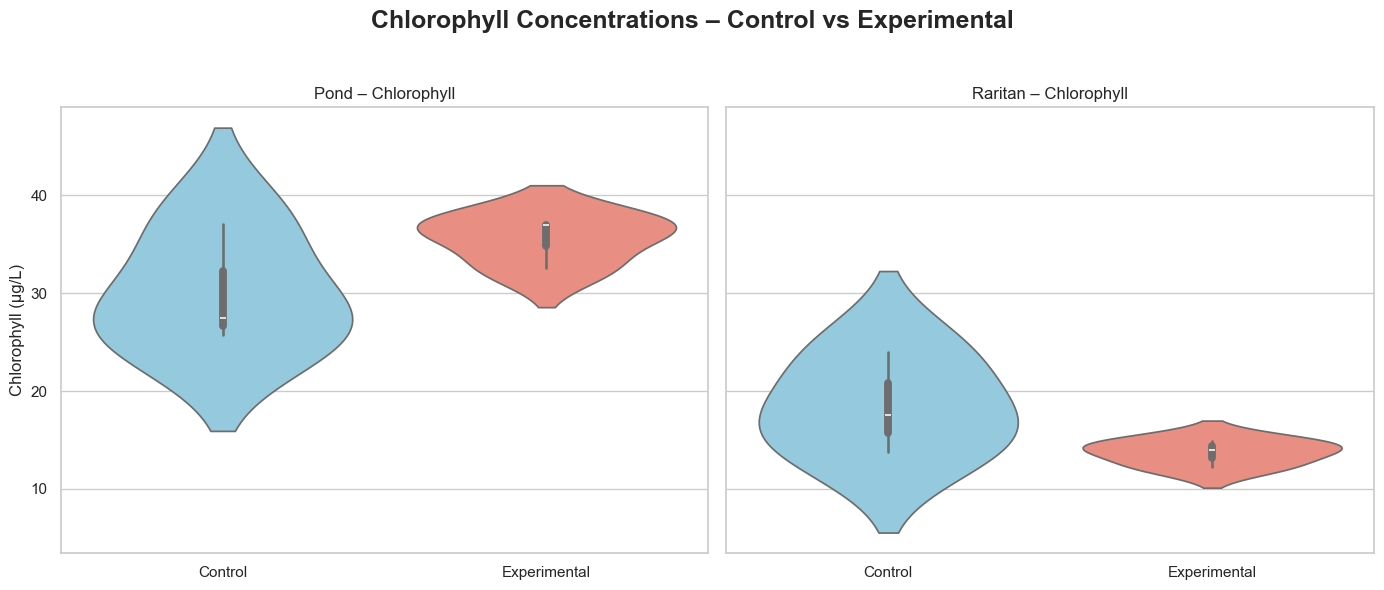

In [8]:
#Convert chl values to be numeric
df['Chl (ug/l)'] = pd.to_numeric(df['Chl (ug/l)'], errors='coerce')

#Add columns for plotting
df['Location'] = df['Sample ID'].apply(lambda x: 'Pond' if x.startswith('p') else 'Raritan')
df['Type'] = df['Sample ID'].apply(lambda x: 'Control' if 'c' in x else 'Experimental')

#Set style
sns.set(style="whitegrid", palette="muted", color_codes=True)

#Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#Pond subplot
sns.violinplot(data=df[df['Location'] == 'Pond'], x='Type', y='Chl (ug/l)', ax=axes[0],palette={"Control": "skyblue", "Experimental": "salmon"})
axes[0].set_title('Pond – Chlorophyll')
axes[0].set_xlabel('')
axes[0].set_ylabel('Chlorophyll (µg/L)')

#Raritan subplot
sns.violinplot(data=df[df['Location'] == 'Raritan'], x='Type', y='Chl (ug/l)', ax=axes[1], palette={"Control": "skyblue", "Experimental": "salmon"})
axes[1].set_title('Raritan – Chlorophyll')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Format the whole figure
fig.suptitle('Chlorophyll Concentrations – Control vs Experimental', fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig('chlorophyll_violinplot.png', dpi=300)
plt.show()

